In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('google_drive_nanreplaced.csv')

In [2]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


In [3]:
data1= df[['time', 'google_drawings_created']]
data2= df[['time', 'google_drawings_edited']]
data1.head()

,time,google_drawings_created
0,2017-03-12 05:00:00,0.0
1,2017-03-14 04:00:00,0.0
2,2017-03-16 04:00:00,0.0
3,2017-03-19 04:00:00,0.0
4,2017-03-20 04:00:00,0.0


In [4]:
data1.describe()

,google_drawings_created
count,831.000000
mean,3.468912
std,6.841251
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,143.000000


In [5]:
data2.describe()

,google_drawings_edited
count,831.000000
mean,4.854922
std,7.417803
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,146.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E51F9C208>]],
      dtype=object)

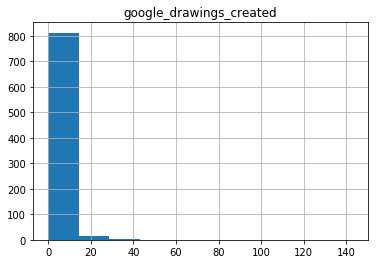

In [6]:
data1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E51E86240>]],
      dtype=object)

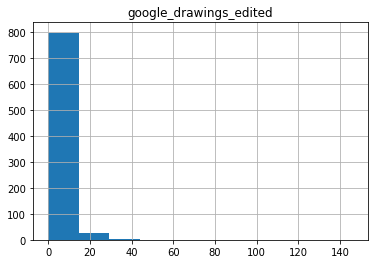

In [7]:
data2.hist()

In [8]:
data1['time'] = pd.to_datetime(data1['time'],utc=True)
data1.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

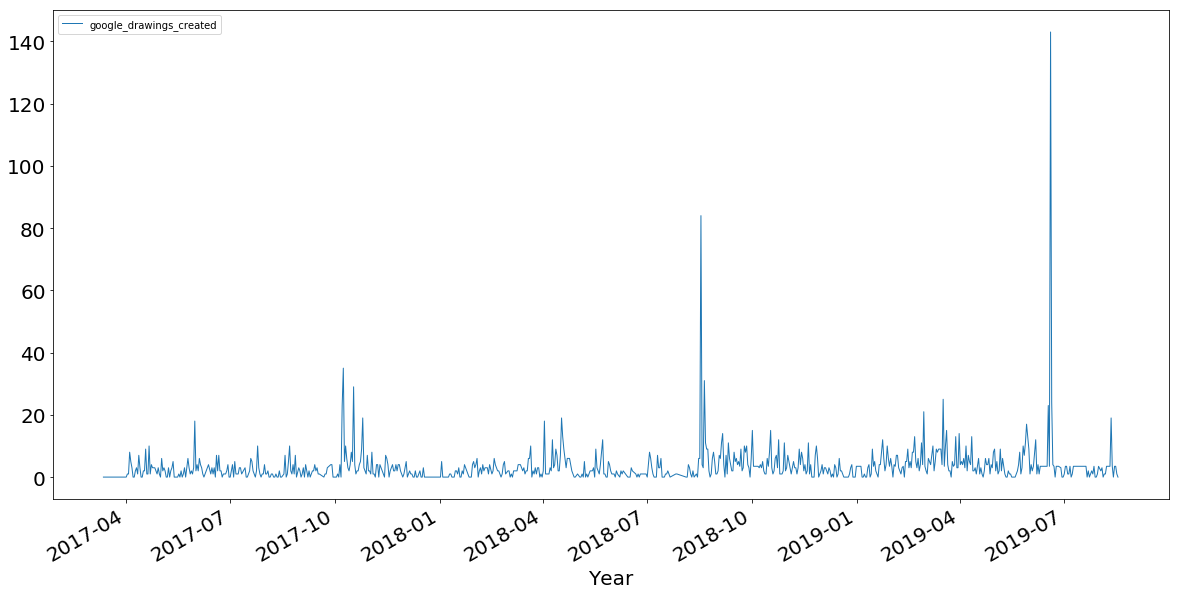

In [9]:
data1.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [10]:
data2['time'] = pd.to_datetime(data2['time'],utc=True)
data2.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

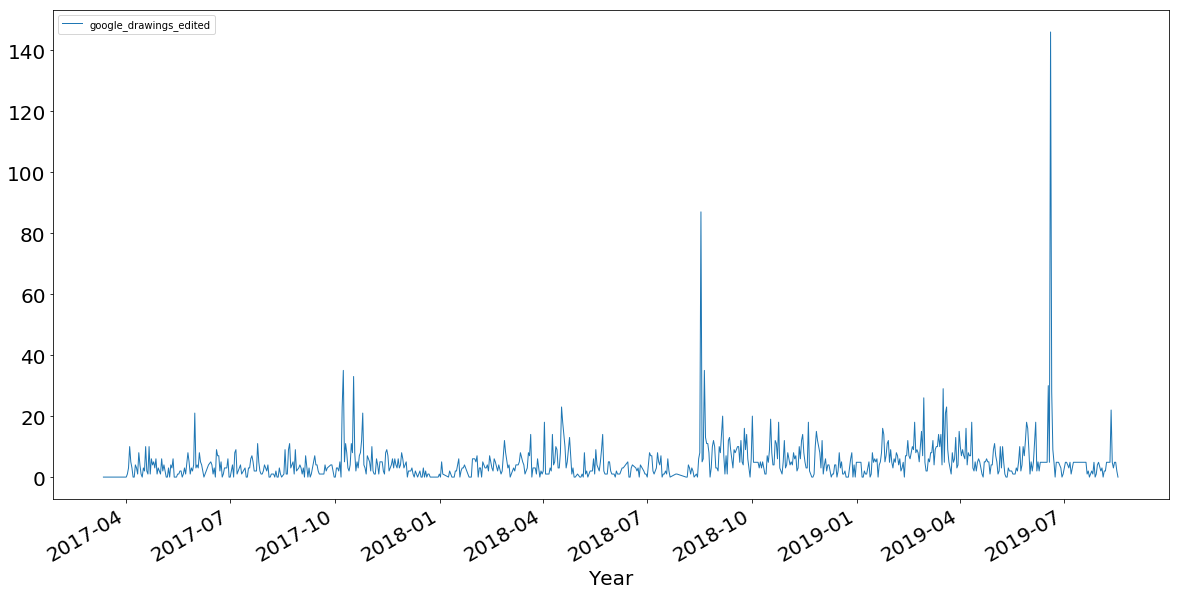

In [11]:
data2.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [12]:
alpha= norm.fit(df['google_drawings_created'])[0]
beta= norm.fit(df['google_drawings_edited'])[1]
oiu= df['google_drawings_created']
density= kde.gaussian_kde(oiu,bw_method=None)

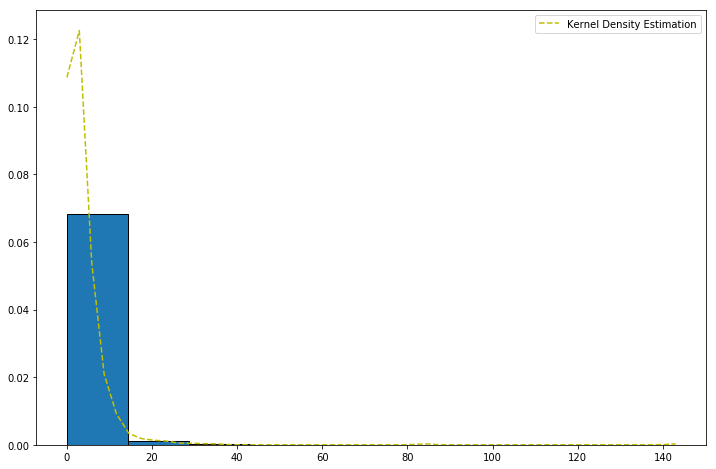

In [13]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [14]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [15]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.18592167481947203, pvalue=0.0)

In [17]:
alpha= norm.fit(df['google_drawings_edited'])[0]
beta= norm.fit(df['google_drawings_edited'])[1]
oiu= df['google_drawings_edited']
density= kde.gaussian_kde(oiu,bw_method=None)

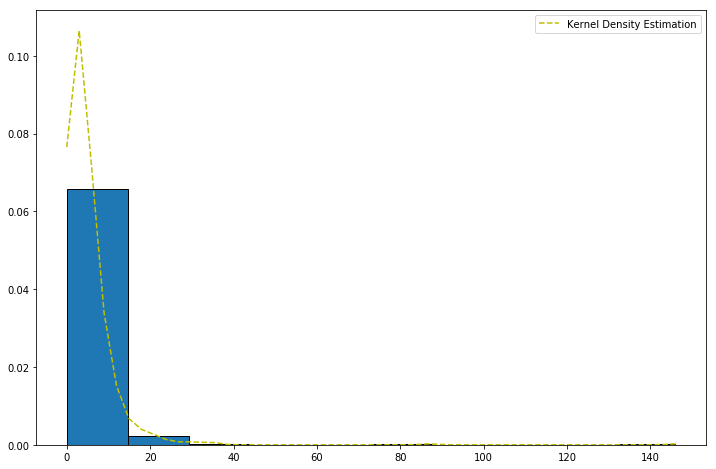

In [18]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [19]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])
kstest(oiu,my_cdf)

KstestResult(statistic=0.13590943492887017, pvalue=7.527312106958561e-14)

Fit the distribution model the selected attribute using the kernel density estimator and from the very low p value we can see that the distribution is correct. the distribution followed here for the attribute is th poisson distribution 